In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("Sentiment.csv")

In [3]:
df.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [4]:
df.shape

(13871, 21)

In [5]:
df.dtypes

id                             int64
candidate                     object
candidate_confidence         float64
relevant_yn                   object
relevant_yn_confidence       float64
sentiment                     object
sentiment_confidence         float64
subject_matter                object
subject_matter_confidence    float64
candidate_gold                object
name                          object
relevant_yn_gold              object
retweet_count                  int64
sentiment_gold                object
subject_matter_gold           object
text                          object
tweet_coord                   object
tweet_created                 object
tweet_id                       int64
tweet_location                object
user_timezone                 object
dtype: object

In [6]:
df['sentiment'].value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

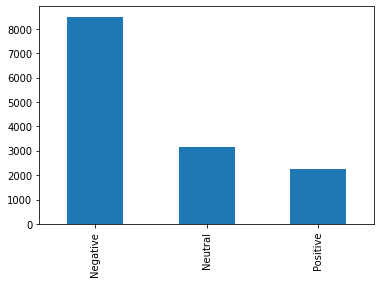

In [7]:
df['sentiment'].value_counts().plot.bar()

In [8]:
df['candidate'].value_counts()

No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul                  263
Scott Walker               259
John Kasich                242
Name: candidate, dtype: int64

In [9]:
df.groupby(["sentiment","candidate"]).size()

sentiment  candidate             
Negative   Ben Carson                 186
           Chris Christie             218
           Donald Trump              1758
           Jeb Bush                   589
           John Kasich                 82
           Marco Rubio                105
           Mike Huckabee              237
           No candidate mentioned    4724
           Rand Paul                  148
           Scott Walker               179
           Ted Cruz                   221
Neutral    Ben Carson                  54
           Chris Christie              42
           Donald Trump               446
           Jeb Bush                    72
           John Kasich                 47
           Marco Rubio                 51
           Mike Huckabee               83
           No candidate mentioned    2087
           Rand Paul                   60
           Scott Walker                38
           Ted Cruz                   126
Positive   Ben Carson                 164


In [0]:
df2 = df[["sentiment","candidate","text"]]

In [11]:
df2.head()

,sentiment,candidate,text
0,Neutral,No candidate mentioned,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,Scott Walker,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,No candidate mentioned,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,No candidate mentioned,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,Donald Trump,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [0]:
# Now after EDA we will do preprocessing of data, we are making a function here to remove RT @ from sentence,however others words which are not necessary can be remove.
def tweet_process(tweet):
  tweet =str(tweet)
  if tweet.startswith("RT @"):
    tweet =tweet.replace("RT @", "")
  return tweet

In [13]:
df2.text = df2.text.apply(lambda x:tweet_process(x))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df2.head()

,sentiment,candidate,text
0,Neutral,No candidate mentioned,NancyLeeGrahn: How did everyone feel about the...
1,Positive,Scott Walker,ScottWalker: Didn't catch the full #GOPdebate ...
2,Neutral,No candidate mentioned,TJMShow: No mention of Tamir Rice and the #GOP...
3,Positive,No candidate mentioned,RobGeorge: That Carly Fiorina is trending -- h...
4,Positive,Donald Trump,DanScavino: #GOPDebate w/ @realDonaldTrump del...


In [16]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
max_features= 2000
smallTokenizer = Tokenizer(num_words=max_features)


In [0]:
smallTokenizer.fit_on_texts(df2.text)

In [29]:
smallTokinizer.word_counts

OrderedDict([('nancyleegrahn', 6),
             ('how', 625),
             ('did', 435),
             ('everyone', 92),
             ('feel', 64),
             ('about', 1143),
             ('the', 8907),
             ('climate', 72),
             ('change', 82),
             ('question', 348),
             ('last', 891),
             ('night', 647),
             ('exactly', 22),
             ('gopdebate', 8939),
             ('scottwalker', 89),
             ("didn't", 256),
             ('catch', 9),
             ('full', 45),
             ('here', 139),
             ('are', 812),
             ('some', 167),
             ('of', 3379),
             ("scott's", 2),
             ('best', 185),
             ('lines', 14),
             ('in', 1988),
             ('90', 12),
             ('seconds', 16),
             ('walker16', 28),
             ('http', 2992),
             ('t', 3723),
             ('co', 3608),
             ('zsff…', 1),
             ('tjmshow', 1),
             ('no',

In [0]:

X = smallTokenizer.texts_to_sequences(df2.text)

In [32]:
X[0]

[57, 85, 343, 462, 26, 2, 421, 377, 102, 34, 56, 1045, 1]

In [33]:
df2.text[0]

'NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

In [35]:
len(X),df2.shape

(13871, (13871, 3))

In [0]:
padded_X=pad_sequences(X,maxlen=29)

In [39]:
padded_X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,   57,   85,  343,  462,   26,    2,
        421,  377,  102,   34,   56, 1045,    1], dtype=int32)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,LSTM,Embedding
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.activations import softmax,relu
from tensorflow.keras.utils import to_categorical

In [0]:
model =Sequential()
model.add(Embedding(max_features,128,input_length=29))
model.add(LSTM(196,dropout=0.2))
model.add(Dense(3,activation=softmax))

In [0]:
Y =pd.get_dummies(df2.sentiment)

In [45]:
Y

,Negative,Neutral,Positive
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
13866,1,0,0
13867,0,0,1
13868,0,0,1
13869,1,0,0


In [0]:
model.compile(optimizer="rmsprop",loss=categorical_crossentropy,metrics=['acc'])

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 128)           256000    
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 3)                 591       
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(padded_X,Y,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
174/174 [==============================] - 23s 131ms/step - loss: 0.7111 - acc: 0.6979 - val_loss: 0.7334 - val_acc: 0.6933
Epoch 2/10
174/174 [==============================] - 22s 127ms/step - loss: 0.6653 - acc: 0.7204 - val_loss: 0.7132 - val_acc: 0.6894
Epoch 3/10
174/174 [==============================] - 22s 128ms/step - loss: 0.6355 - acc: 0.7312 - val_loss: 0.6800 - val_acc: 0.7114
Epoch 4/10
174/174 [==============================] - 22s 129ms/step - loss: 0.6160 - acc: 0.7453 - val_loss: 0.6945 - val_acc: 0.6991
Epoch 5/10
174/174 [==============================] - 22s 127ms/step - loss: 0.6000 - acc: 0.7490 - val_loss: 0.7199 - val_acc: 0.7034
Epoch 6/10
174/174 [==============================] - 22s 127ms/step - loss: 0.5842 - acc: 0.7579 - val_loss: 0.7419 - val_acc: 0.6861
Epoch 7/10
174/174 [==============================] - 22s 127ms/step - loss: 0.5681 - acc: 0.7675 - val_loss: 0.7249 - val_acc: 0.7056
Epoch 8/10
174/174 [==============================] - 2